In [35]:
import pandas as pd

war_df = pd.read_csv('../data/processed/war-ukraine-extended-ordered.csv', index_col=[0])

In [36]:
war_df.head()

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words
0,ΚΑΘΗΜΕΡΙΝΗ,05-07-2022,el,Μπορέλ: O Πούτιν πρέπει να επιλέξει «ανάμεσα σ...,ΚΟΣΜΟΣ,"Οι κυρώσεις, που έχουν επιβληθεί στην Ρωσία σε...",False,0,NaN,https://www.kathimerini.gr/world/561942142/mpo...,4114,627
1,ΚΑΘΗΜΕΡΙΝΗ,05-07-2022,el,Μαριούπολη: Οι φιλορώσοι αυτονομιστές κατέσχεσ...,ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ,Οι φιλορώσοι αυτονομιστές κατέλαβαν δύο πλοία ...,False,0,NaN,https://www.kathimerini.gr/world/561942133/mar...,2548,360
2,ΚΑΘΗΜΕΡΙΝΗ,05-07-2022,el,Πρόβλεψη για αύξηση του εμπορίου μεταξύ Ρωσίας...,ΔΙΕΘΝΗΣ ΟΙΚΟΝΟΜΙΑ,Ο εμπορικός τζίρος μεταξύ Τουρκίας και Ρωσίας ...,False,0,NaN,https://www.kathimerini.gr/economy/internation...,1848,274
3,ΚΑΘΗΜΕΡΙΝΗ,05-07-2022,el,Σακελλαροπούλου σε Ζελένσκι: Είμαστε και θα εί...,ΠΟΛΙΤΙΚΗ,«Το απαραβίαστο των συνόρων είναι η βάση της σ...,False,0,NaN,https://www.kathimerini.gr/politics/561941488/...,2472,371
4,ΚΑΘΗΜΕΡΙΝΗ,05-07-2022,el,Ουκρανία: Το ρωσοκρατούμενο πυρηνικό εργοστάσι...,ΚΟΣΜΟΣ,"Ο μεγαλύτερος πυρηνικός σταθμός της Ευρώπης, μ...",False,0,NaN,https://www.kathimerini.gr/world/561941377/oyk...,2829,418


In [37]:
war_df.tail()

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words
13731,THE GUARDIAN,02-07-2022,en,Russia-Ukraine war: what we know on day 129 of...,WORLD,Powerful explosions shook Ukraine’s southern c...,False,0,NaN,https://www.theguardian.com/world/2022/jul/02/...,4197,632
13732,THE GUARDIAN,03-07-2022,en,Russia-Ukraine war: ‘Many killed’ in attack on...,WORLD,13.44'Many killed' in attack on eastern Ukrain...,False,0,NaN,https://www.theguardian.com/world/live/2022/ju...,18068,2729
13733,THE GUARDIAN,03-07-2022,en,Russia-Ukraine war: what we know on day 130 of...,WORLD,Russia claims it has taken full control of Lys...,False,0,NaN,https://www.theguardian.com/world/2022/jul/03/...,3597,546
13734,THE GUARDIAN,03-07-2022,en,Medics battle relentless wave of trauma in Ukr...,WORLD,"Ludmilla Boiko can’t sleep. Every night, befor...",False,0,NaN,https://www.theguardian.com/world/2022/jul/03/...,8698,1473
13735,THE GUARDIAN,03-07-2022,en,"Yes, Nato has a new vitality. But its united f...",COMMENTISFREE,Most summits bill themselves as “historic” and...,False,0,NaN,https://www.theguardian.com/commentisfree/2022...,7195,1183


In [38]:
war_df.memory_usage(deep=True).sum()

116018679

In [39]:
from enum import Enum

class Publishers(Enum):
    KATHIMERINI = 'ΚΑΘΗΜΕΡΙΝΗ'
    EFSYN = 'ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ'
    NAFTEMPORIKI = 'ΝΑΥΤΕΜΠΟΡΙΚΗ'
    THE_GUARDIAN = 'THE GUARDIAN'

class Lang(Enum):
    ENGLISH = 'en'
    GREEK = 'el'

In [40]:
from pandas.api.types import CategoricalDtype
publisher_dtype = CategoricalDtype(
    categories=[Publishers.KATHIMERINI.value,
                Publishers.EFSYN.value,
                Publishers.NAFTEMPORIKI.value,
                Publishers.THE_GUARDIAN.value
                ],
    ordered=True)
lang_enum = CategoricalDtype(
    categories=[Lang.GREEK.value,
                Lang.ENGLISH.value
                ],
    ordered=True)

In [41]:
war_df['Publisher'] = war_df['Publisher'].astype(publisher_dtype)
war_df['Lang'] = war_df['Lang'].astype(lang_enum)
war_df['Tag'] = war_df['Tag'].astype('category')
war_df['Text'] = war_df['Text'].fillna('').astype('string')
war_df['Comments api key'] = war_df['Comments api key'].fillna('').astype('string')
war_df['Comments count'] = war_df['Comments count'].astype('int32')
war_df['Heading'] = war_df['Heading'].astype('string')
war_df['Date Formatted'] = pd.to_datetime(war_df['Date Formatted'], format="%d-%m-%Y")
war_df['Year'] = pd.DatetimeIndex(war_df['Date Formatted']).year
war_df['Month'] = pd.DatetimeIndex(war_df['Date Formatted']).month
war_df['Day'] = pd.DatetimeIndex(war_df['Date Formatted']).day

In [42]:
war_df.dtypes

Publisher                 category
Date Formatted      datetime64[ns]
Lang                      category
Heading                     string
Tag                       category
Text                        string
Comments exist                bool
Comments count               int32
Comments api key            string
Article url                 object
Chars                        int64
Words                        int64
Year                         int64
Month                        int64
Day                          int64
dtype: object

In [43]:
war_df.isna().sum()

Publisher           0
Date Formatted      0
Lang                0
Heading             0
Tag                 0
Text                0
Comments exist      0
Comments count      0
Comments api key    0
Article url         0
Chars               0
Words               0
Year                0
Month               0
Day                 0
dtype: int64

In [44]:
war_df[war_df['Text'].isna()]

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day


In [84]:
war_df.tail()

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day
13731,THE GUARDIAN,2022-07-02,en,Russia-Ukraine war: what we know on day 129 of...,WORLD,Powerful explosions shook Ukraine’s southern c...,False,0,,https://www.theguardian.com/world/2022/jul/02/...,4197,632,2022,7,2
13732,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: ‘Many killed’ in attack on...,WORLD,13.44'Many killed' in attack on eastern Ukrain...,False,0,,https://www.theguardian.com/world/live/2022/ju...,18068,2729,2022,7,3
13733,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: what we know on day 130 of...,WORLD,Russia claims it has taken full control of Lys...,False,0,,https://www.theguardian.com/world/2022/jul/03/...,3597,546,2022,7,3
13734,THE GUARDIAN,2022-07-03,en,Medics battle relentless wave of trauma in Ukr...,WORLD,"Ludmilla Boiko can’t sleep. Every night, befor...",False,0,,https://www.theguardian.com/world/2022/jul/03/...,8698,1473,2022,7,3
13735,THE GUARDIAN,2022-07-03,en,"Yes, Nato has a new vitality. But its united f...",COMMENTISFREE,Most summits bill themselves as “historic” and...,False,0,,https://www.theguardian.com/commentisfree/2022...,7195,1183,2022,7,3


In [76]:
# date range => efsyn has range from 2014
war_df_132 = war_df[war_df['Date Formatted'] > '2022-02-23']

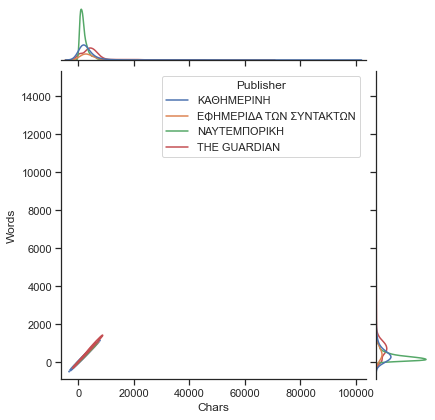

In [79]:
import seaborn as sns
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=war_df[war_df['Date Formatted'] > '2022-02-23'],
    x="Chars", y="Words", hue="Publisher",
    kind="kde",
)

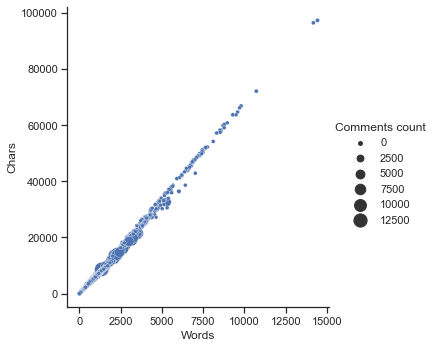

In [49]:
sns.relplot(x="Words", y="Chars", size="Comments count", sizes=(15, 200), data=war_df);

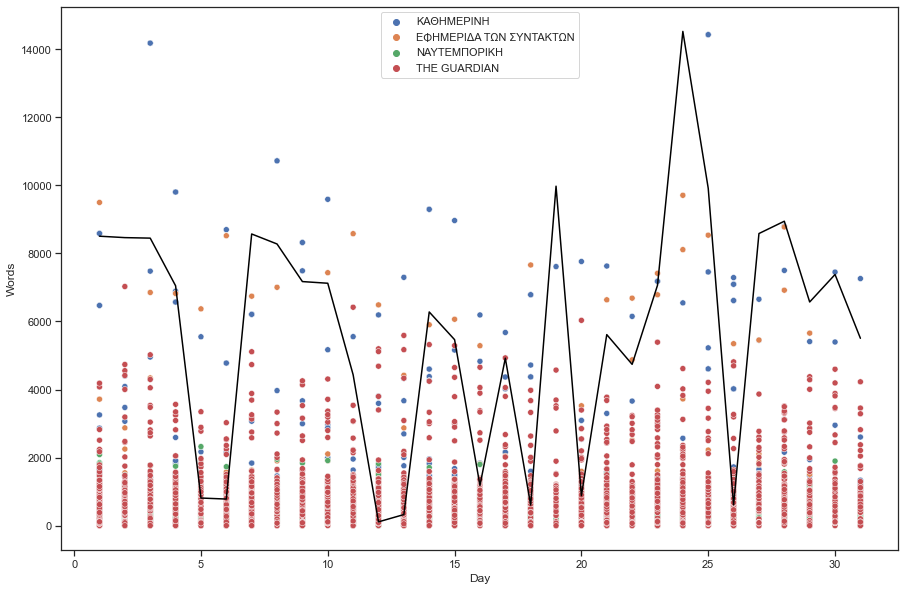

In [55]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='Day',
                     y='Words',
                     hue='Publisher',
                     legend='full',
                     data=war_df)
max_transistors_per_year = war_df.groupby('Day')['Comments count'].max()
sns.lineplot(data=max_transistors_per_year,
             ax=ax.axes,
             color='black')
# ax.set_xlim(2006, 2021)
plt.show()

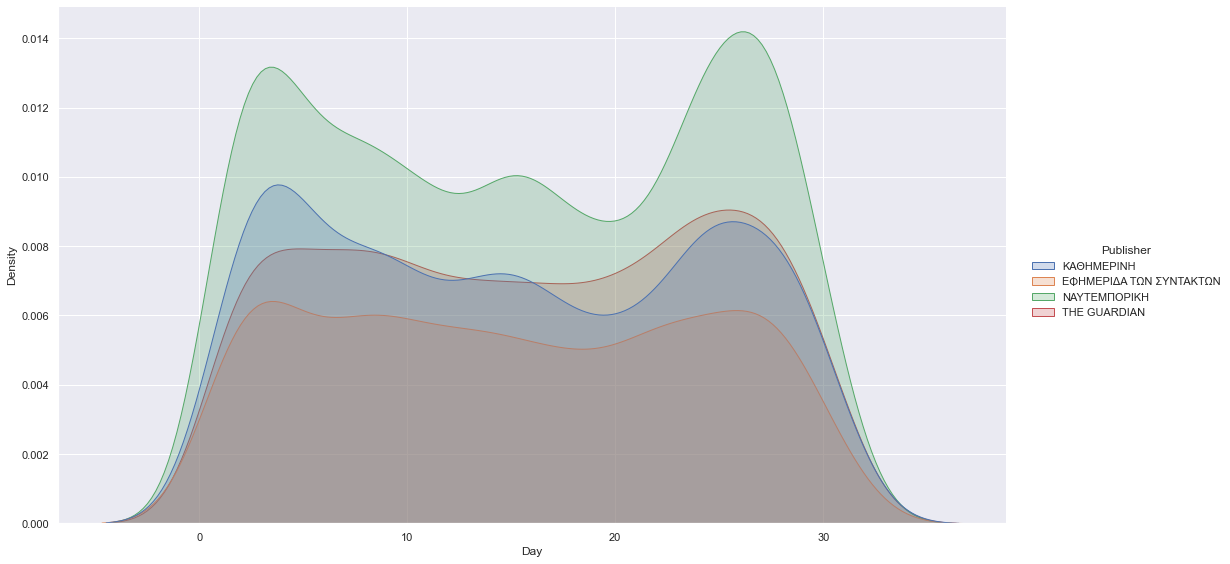

In [82]:
sns.set_theme(style="darkgrid")
sns.displot(war_df,
            x="Day",
            hue="Publisher",
            kind="kde",
            fill=True,
            height=8,
            aspect=1.8)

<AxesSubplot:>

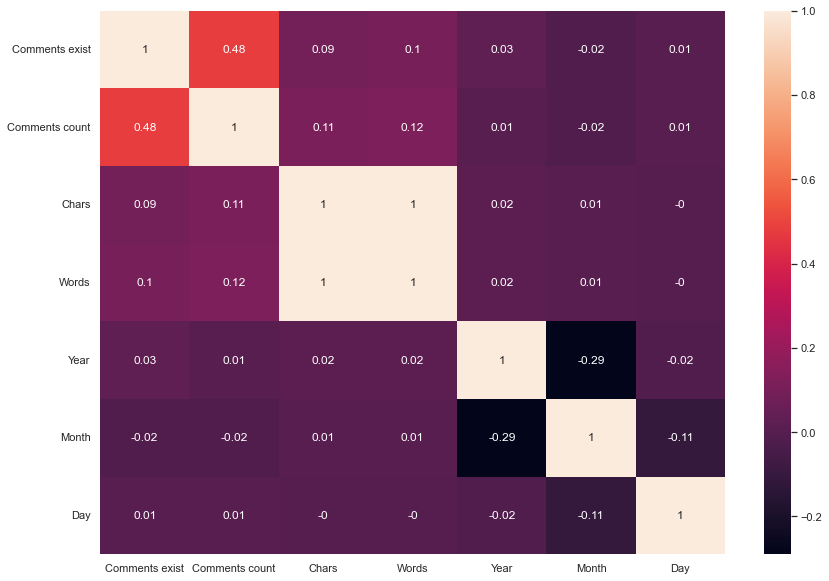

In [60]:
correlation_matrix = war_df.corr().round(2)
sns.set(rc = {'figure.figsize':(14, 10)})
sns.heatmap(data=correlation_matrix, annot=True)

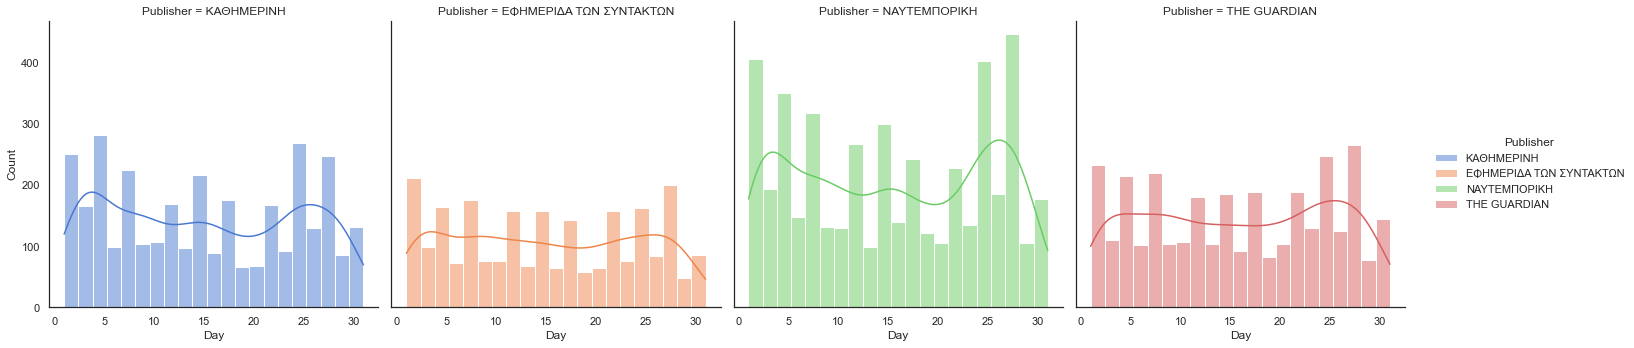

In [65]:
sns.set(style="white", palette="muted", color_codes=True)
sns.displot(data=war_df, x="Day", hue="Publisher", col="Publisher", kde=True)
plt.show()

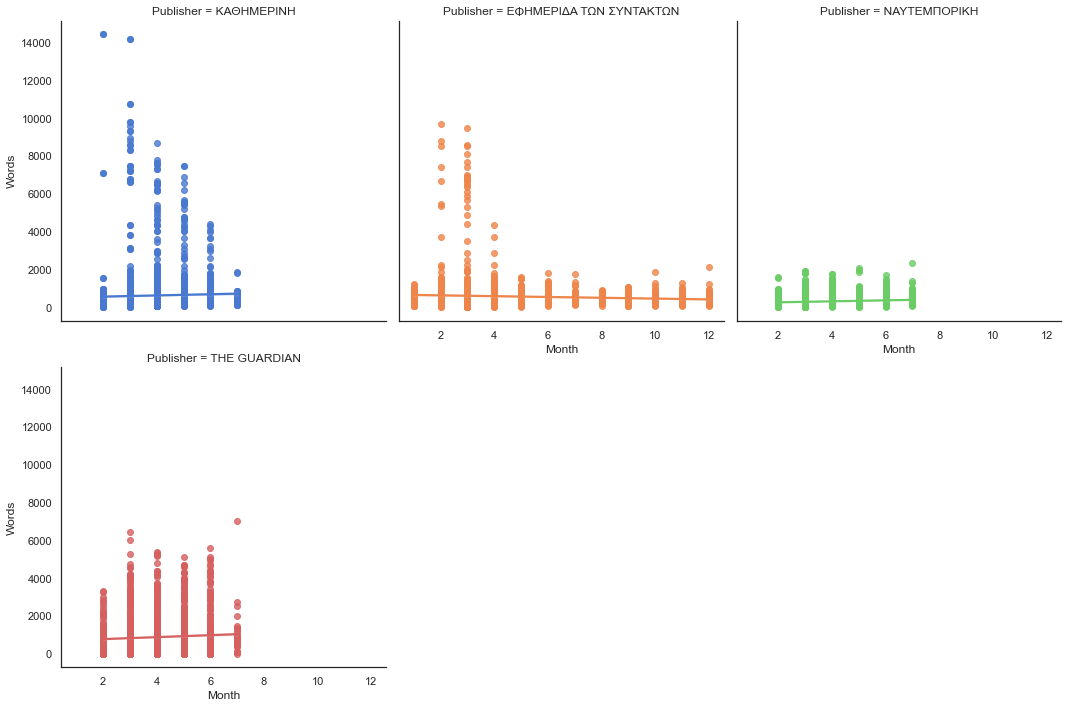

In [70]:
sns.lmplot(x='Month', y='Words', data=war_df, hue='Publisher', col='Publisher', col_wrap=3)
plt.tight_layout()